In [2]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [3]:
#importing datasets
train_data = pd.read_csv("train_2v.csv")
test_data = pd.read_csv("test_2v.csv")

In [5]:
train_data.shape

(43400, 12)

In [6]:
test_data.shape

(18601, 11)

In [7]:
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [8]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [9]:
#cleaning

In [10]:
train_data.isnull().sum()/len(train_data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [11]:
test_data.isnull().sum()/len(test_data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64

In [12]:
joined_data = pd.concat([train_data,test_data])

/Users/thegeorgejoseph/Environments/development/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [13]:
print ('Joined Data Shape: {}'.format(joined_data.shape))

Joined Data Shape: (62001, 12)


In [14]:
joined_data.isnull().sum()/len(joined_data)*100

Residence_type        0.000000
age                   0.000000
avg_glucose_level     0.000000
bmi                   3.311237
ever_married          0.000000
gender                0.000000
heart_disease         0.000000
hypertension          0.000000
id                    0.000000
smoking_status       30.714021
stroke               30.001129
work_type             0.000000
dtype: float64

In [15]:
train_data["bmi"]=train_data["bmi"].fillna(train_data["bmi"].mean())

In [16]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [17]:
#handling categorical data

In [18]:
label = LabelEncoder()
train_data['gender'] = label.fit_transform(train_data['gender'])
train_data['ever_married'] = label.fit_transform(train_data['ever_married'])
train_data['work_type']= label.fit_transform(train_data['work_type'])
train_data['Residence_type']= label.fit_transform(train_data['Residence_type'])

In [19]:
train_data_with_smoke = train_data[train_data['smoking_status'].notnull()]

In [20]:
train_data_with_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,never smoked,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,formerly smoked,0
6,52800,0,52.0,0,0,1,2,1,77.59,17.7,formerly smoked,0
7,41413,0,75.0,0,1,1,3,0,243.53,27.0,never smoked,0
8,15266,0,32.0,0,0,1,2,0,77.67,32.3,smokes,0


In [21]:
train_data_with_smoke['smoking_status']= label.fit_transform(train_data_with_smoke['smoking_status'])

/Users/thegeorgejoseph/Environments/development/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
train_data_with_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,52800,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,41413,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,15266,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [23]:
train_data_with_smoke.shape

(30108, 12)

In [24]:
train_data_with_smoke.drop(columns='id',axis=1,inplace=True)

/Users/thegeorgejoseph/Environments/development/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
train_data_with_smoke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [26]:
train_data_with_smoke['smoking_status'].value_counts()

1    16053
0     7493
2     6562
Name: smoking_status, dtype: int64

In [27]:
train_data_with_smoke.corr('pearson')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.040785,0.037431,0.097549,0.024852,0.010247,0.004814,0.053496,0.019278,-0.013613,0.013689
age,0.040785,1.000000,0.259528,0.251819,0.546996,0.018850,0.004044,0.230682,0.101619,-0.147968,0.159838
hypertension,0.037431,0.259528,1.000000,0.114957,0.133258,0.019309,-0.004427,0.154702,0.120730,-0.030094,0.073310
heart_disease,0.097549,0.251819,0.114957,1.000000,0.098229,0.034466,-0.000583,0.139449,0.018562,-0.035660,0.107007
ever_married,0.024852,0.546996,0.133258,0.098229,1.000000,-0.067305,0.004990,0.120161,0.139949,-0.053049,0.051666
work_type,0.010247,0.018850,0.019309,0.034466,-0.067305,1.000000,-0.010796,0.008315,-0.066278,-0.030810,0.025708
Residence_type,0.004814,0.004044,-0.004427,-0.000583,0.004990,-0.010796,1.000000,-0.001361,-0.002944,0.010095,0.002064
avg_glucose_level,0.053496,0.230682,0.154702,0.139449,0.120161,0.008315,-0.001361,1.000000,0.167699,-0.035164,0.077206
bmi,0.019278,0.101619,0.120730,0.018562,0.139949,-0.066278,-0.002944,0.167699,1.000000,-0.035568,-0.006950
smoking_status,-0.013613,-0.147968,-0.030094,-0.035660,-0.053049,-0.030810,0.010095,-0.035164,-0.035568,1.000000,-0.023068


In [28]:
train_data_with_smoke['work_type'].value_counts()

2    19585
3     5445
0     4346
4      631
1      101
Name: work_type, dtype: int64

In [29]:
#handling imbalanced data

In [30]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE()

In [31]:
X_resampled, y_resampled = ros.fit_resample(train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'], 
                                            train_data_with_smoke['stroke'])

In [32]:
print ('ROS Input Data Shape for Smoke Data: {}'.format(X_resampled.shape))
print ('ROS Output Data Shape for Smoke Data: {}'.format(y_resampled.shape))

ROS Input Data Shape for Smoke Data: (58940, 10)
ROS Output Data Shape for Smoke Data: (58940,)


In [33]:
#train test split of balanced data

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(47152, 10)
(11788, 10)


In [35]:
#implementing the model

/Users/thegeorgejoseph/Environments/development/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5794
           1       0.75      0.77      0.76      5994

    accuracy                           0.75     11788
   macro avg       0.75      0.75      0.75     11788
weighted avg       0.75      0.75      0.75     11788

0.7534781133355956
[[4266 1528]
 [1378 4616]]
precision =  0.7513020833333334 
 recall =  0.7701034367701034


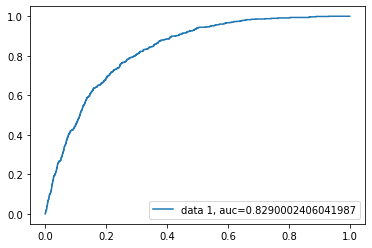

                   Importance
heart_disease        1.230438
hypertension         0.364780
Residence_type       0.304150
age                  0.066146
gender               0.016423
work_type            0.014580
avg_glucose_level    0.003553
bmi                 -0.023166
smoking_status      -0.143867
ever_married        -0.314008


In [36]:
log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
impFeatures = pd.DataFrame(log.coef_[0] ,index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

In [37]:
model = LogisticRegression(penalty='l2', C=0.1)
model.fit(X_train,y_train)

/Users/thegeorgejoseph/Environments/development/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#predicting class labels for test set
predicted = model.predict(X_test)

In [39]:
#generating class probabilities for test set
probs = model.predict_proba(X_test)

In [40]:
# generate evaluation metrics
print("Accuracy Score = ",metrics.accuracy_score(y_test, predicted))
print("AUC Score = ",metrics.roc_auc_score(y_test, probs[:, 1]))

Accuracy Score =  0.7534781133355956
AUC Score =  0.8290002406041987


In [41]:
scores = cross_val_score(LogisticRegression(), X_resampled, y_resampled, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

/Users/thegeorgejoseph/Environments/development/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/thegeorgejoseph/Environments/development/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http

[0.74618256 0.74177129 0.7455039  0.75093315 0.76077367 0.75805904
 0.75822871 0.74703088 0.76145232 0.75839837]
0.7528333898880218


/Users/thegeorgejoseph/Environments/development/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
array = np.array([(1,65.0,0,0,1,2,1,103.12,31.4,2), (0,45.0,1,0,1,1,0,89.82,28.4,1)])

In [43]:
array

array([[  1.  ,  65.  ,   0.  ,   0.  ,   1.  ,   2.  ,   1.  , 103.12,
         31.4 ,   2.  ],
       [  0.  ,  45.  ,   1.  ,   0.  ,   1.  ,   1.  ,   0.  ,  89.82,
         28.4 ,   1.  ]])

In [44]:
newpred = model.predict(array)

In [45]:
newpred

array([1, 0])

In [46]:
new_predictions = model.predict_proba(array)

In [47]:
new_predictions

array([[0.48303454, 0.51696546],
       [0.74255615, 0.25744385]])

In [48]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [49]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7534781133355956
